<a href="https://colab.research.google.com/github/ialbornoz2016/CAP4613/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 2s 0us/step
Samples of the training images


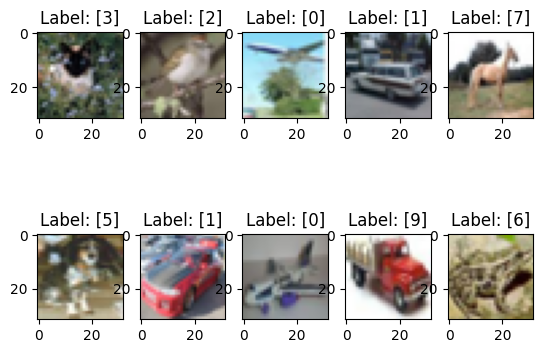

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from keras.utils.np_utils import to_categorical

def img_plt(images, labels):
  plt.figure()
  for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(images[i-1,:,:], cmap='gray')
    plt.title('Label: ' + str(labels[i-1]))
  plt.show

def feat_plot(features,labels,classes):
  for class_i in classes:
    plt.plot(features[labels[:]==classes[classes_i],0], features[labels[:]==classes[classes_i],1],'o', markersize=15)
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[classes_i]) for classes_i in classes])
  plt.show

def acc_fun(labels_actual, labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc

(x_train,y_train), (x_test,y_test) = cifar10.load_data()
classes=np.arange(10)

#Shuffling training data
num_train_img=x_train.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train=x_train[train_ind_s,:,:]
y_train=y_train[train_ind_s]
#Selecting 20% of training imgs for validation
x_val=x_train[0:int(0.2*num_train_img),:,:]
y_val=y_train[0:int(0.2*num_train_img)]
#Rest of training set
x_train=x_train[int(0.2*num_train_img):,:,:]
y_train=y_train[int(0.2*num_train_img):]

print('Samples of the training images')
img_plt(x_train[0:10,:,:],y_train[0:10])

#Scaling images
x_train=x_train.astype('float32')
x_val=x_val.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

#convert vectors to binary class matrices
y_train_c = to_categorical(y_train, len(classes))
y_val_c = to_categorical(y_val, len(classes))
y_test_c = to_categorical(y_test, len(classes))



Problem 3e) No datagen with learning rate of 0.001

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_20 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_21 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

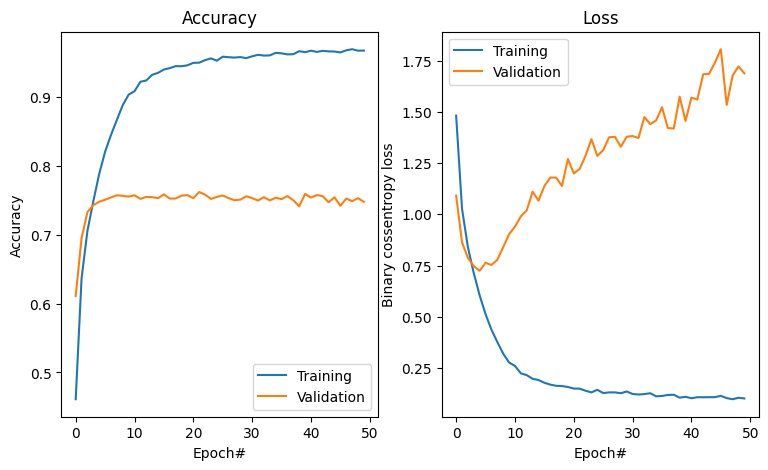

1250/1250 [==============================] - 4s 3ms/step - loss: 0.3919 - accuracy: 0.8748
Total loss on training set:  0.39190906286239624
Accuracy of training set:  0.8748499751091003
313/313 [==============================] - 1s 3ms/step - loss: 0.7244 - accuracy: 0.7477
Total loss on validation set:  0.7244084477424622
Accuracy of validation set:  0.7476999759674072


In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from  keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train, epochs, accuracy_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training', 'Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train, epochs, loss_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary cossentropy loss')
  plt.title('Loss')
  plt.legend(['Training', 'Validation'])
  plt.show()

#defining the model
model_a=Sequential()
model_a.add(Conv2D(32, (3,3), padding = 'same', input_shape=x_train.shape[1:]))
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3, 3), padding = 'same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(64, (3,3), padding = 'same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3, 3), padding = 'same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Flatten())
model_a.add(Dense(units=512, activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(units=len(classes), activation='softmax'))
model_a.summary()

opt= tf.keras.optimizers.Adam(learning_rate=0.001)
model_a.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Creating data generator for real-time data augmentation
datagen= ImageDataGenerator(
    #shear_range=0.1
    #zoom_range=0.1,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False)

#compute quantites require for featurewise normalization
#(std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

#Creating checkpoint to save best model based on lowest validation loss.
save_path='/content/drive/My Drive/model_a_fashion_mnist.h5'
callbacks_save=ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True, save_freq='epoch')

#fits model on batches w/ real-time data augmentation
history = model_a.fit(datagen.flow(x_train, y_train_c, batch_size=32),
                      steps_per_epoch=len(x_train) / 32, epochs = 50,
                      verbose=1,
                      validation_data=(x_val, y_val_c),
                      callbacks=[callbacks_save])

plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['accuracy'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_accuracy'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

#Loading best model
model_a=load_model(save_path)

#Evaluating model on training samples
score=model_a.evaluate(x_train,y_train_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

#Evaluating model on validation set
score=model_a.evaluate(x_val,y_val_c)
print('Total loss on validation set: ', score[0])
print("Accuracy of validation set: ", score[1])

Problem 3f) with datagen and learning rate of 0.001

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

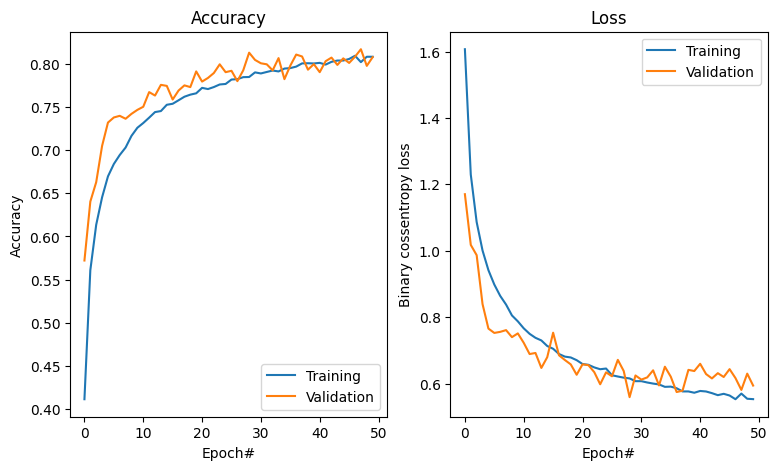

1250/1250 [==============================] - 4s 3ms/step - loss: 0.4054 - accuracy: 0.8607
Total loss on training set:  0.4054231643676758
Accuracy of training set:  0.8606749773025513
313/313 [==============================] - 1s 4ms/step - loss: 0.5592 - accuracy: 0.8130
Total loss on validation set:  0.5591597557067871
Accuracy of validation set:  0.8130000233650208


In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from  keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train, epochs, accuracy_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training', 'Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train, epochs, loss_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary cossentropy loss')
  plt.title('Loss')
  plt.legend(['Training', 'Validation'])
  plt.show()

#defining the model
model_a=Sequential()
model_a.add(Conv2D(32, (3,3), padding = 'same', input_shape=x_train.shape[1:]))
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3, 3), padding = 'same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(64, (3,3), padding = 'same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3, 3), padding = 'same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Flatten())
model_a.add(Dense(units=512, activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(units=len(classes), activation='softmax'))
model_a.summary()

opt= tf.keras.optimizers.Adam(learning_rate=0.001)
model_a.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Creating data generator for real-time data augmentation
datagen= ImageDataGenerator(
    #shear_range=0.1
    #zoom_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

#compute quantites require for featurewise normalization
#(std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

#Creating checkpoint to save best model based on lowest validation loss.
save_path='/content/drive/My Drive/model_a_fashion_mnist.h5'
callbacks_save=ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True, save_freq='epoch')

#fits model on batches w/ real-time data augmentation
history = model_a.fit(datagen.flow(x_train, y_train_c, batch_size=32),
                      steps_per_epoch=len(x_train) / 32, epochs = 50,
                      verbose=1,
                      validation_data=(x_val, y_val_c),
                      callbacks=[callbacks_save])

plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['accuracy'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_accuracy'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

#Loading best model
model_a=load_model(save_path)

#Evaluating model on training samples
score=model_a.evaluate(x_train,y_train_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

#Evaluating model on validation set
score=model_a.evaluate(x_val,y_val_c)
print('Total loss on validation set: ', score[0])
print("Accuracy of validation set: ", score[1])



g) What do you observe from the validation loss in both step (e) and (f)? Is the model
overfitting or underfitting the training data? Explain.

Without the use of the data image generator the loss is significantly higher with a difference of 16%. The non data generator is overfitting because of the large gap between the training and validations sets. I would say the model is underfitting because there is a small gap between the training and validation sets with the data image generator.

Problem 3h) With batch normalization, learning rate of 0.01 and batch size of 64

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation_28 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_29 (Activation)  (None, 32, 32, 32)       

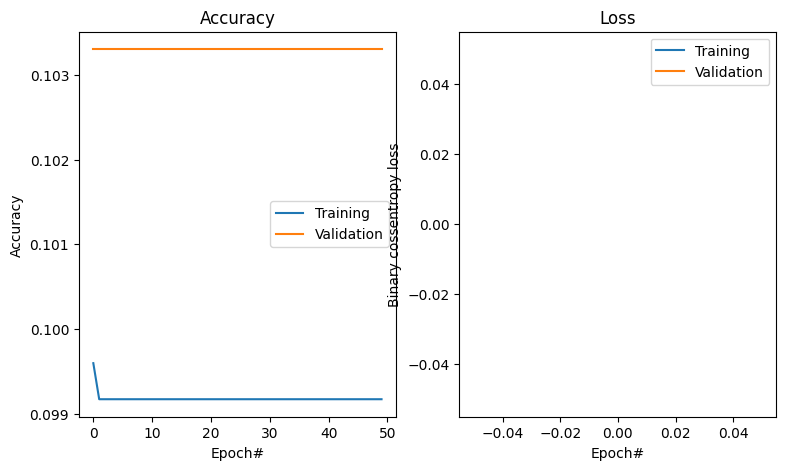

1250/1250 [==============================] - 4s 3ms/step - loss: 0.4054 - accuracy: 0.8607
Total loss on training set:  0.4054231643676758
Accuracy of training set:  0.8606749773025513
313/313 [==============================] - 1s 4ms/step - loss: 0.5592 - accuracy: 0.8130
Total loss on validation set:  0.5591597557067871
Accuracy of validation set:  0.8130000233650208


In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from  keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train, epochs, accuracy_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training', 'Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train, epochs, loss_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary cossentropy loss')
  plt.title('Loss')
  plt.legend(['Training', 'Validation'])
  plt.show()

#defining the model
model_a=Sequential()
model_a.add(Conv2D(32, (3,3), padding = 'same', input_shape=x_train.shape[1:]))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3, 3), padding = 'same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(64, (3,3), padding = 'same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3, 3), padding = 'same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Flatten())
model_a.add(Dense(units=512))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(units=len(classes)))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.summary()

opt= tf.keras.optimizers.Adam(learning_rate=0.01)
model_a.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Creating data generator for real-time data augmentation
datagen= ImageDataGenerator(
    #shear_range=0.1
    #zoom_range=0.1,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True)

#compute quantites require for featurewise normalization
#(std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

#Creating checkpoint to save best model based on lowest validation loss.
save_path='/content/drive/My Drive/model_a_fashion_mnist.h5'
callbacks_save=ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True, save_freq='epoch')

#fits model on batches w/ real-time data augmentation
history = model_a.fit(datagen.flow(x_train, y_train_c, batch_size=64),
                      steps_per_epoch=len(x_train) / 64, epochs = 50,
                      verbose=1,
                      validation_data=(x_val, y_val_c),
                      callbacks=[callbacks_save])

plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['accuracy'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_accuracy'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

#Loading best model
model_a=load_model(save_path)

#Evaluating model on training samples
score=model_a.evaluate(x_train,y_train_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

#Evaluating model on validation set
score=model_a.evaluate(x_val,y_val_c)
print('Total loss on validation set: ', score[0])
print("Accuracy of validation set: ", score[1])

What do you observe from the training loss in both steps (e) and (h)? Explain.


The training loss, which is 0.4054231643676758, is the same between both (e) and (h).